In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [8]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv',index_col='Date')
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col='Date')

In [9]:
dataset_train.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"


In [32]:
training_set = dataset_train.iloc[:,1:2].values

In [33]:
training_set.shape

(1258, 1)

In [39]:
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(X = training_set)

In [42]:
#create a special data structure
X_train = []
y_train = []
time_step = 60
for i in range(time_step,training_set.shape[0]):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

In [43]:
X_train , y_train = np.array(X_train), np.array(y_train)

In [45]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [51]:
from tensorflow.keras.layers import LSTM,Dropout,Dense
from tensorflow.keras.models import Sequential

In [52]:
model = Sequential([
    LSTM(50,return_sequences=True,input_shape=[X_train.shape[1],1]),
    Dropout(0.2),
    
    LSTM(50,return_sequences=True),
    Dropout(0.2),
    
    LSTM(50,return_sequences=True),
    Dropout(0.2),
    
    LSTM(50),
    Dropout(0.2),
    
    Dense(1)
])

In [53]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [54]:
model.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
38/38 [==============================] - 6s 160ms/step - loss: 0.0400
Epoch 2/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0078
Epoch 3/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0060
Epoch 6/100
38/38 [==============================] - 7s 190ms/step - loss: 0.0060
Epoch 7/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0057
Epoch 8/100
38/38 [==============================] - 6s 159ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0053
Epoch 10/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0049
Epoch 11/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0045
Epoch 13/100


38/38 [==============================] - 6s 146ms/step - loss: 0.0013
Epoch 100/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0014


In [61]:
#Now predict the results
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [63]:
X_test = dataset_total[len(dataset_total) -len(dataset_test) - 60:].values

In [65]:
X_test = X_test.reshape(-1,1)

In [66]:
X_test = sc.transform(X_test)

In [67]:
X_test.shape

(80, 1)

In [68]:
inputs = []
for i in range(60,X_test.shape[0]):
    inputs.append(X_test[i-60:i,0])

In [93]:
real_prices = dataset_test.iloc[:,0:1].values

In [88]:
inputs = np.reshape(inputs,(inputs.shape[0],inputs.shape[1],1))

In [92]:
predicted_prices = model.predict(inputs)
predicted_prices = sc.inverse_transform(predicted_prices)

No handles with labels found to put in legend.


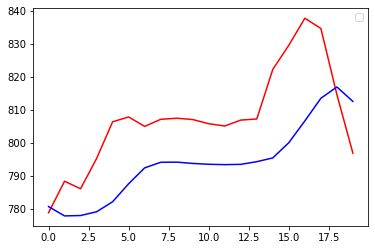

In [94]:
plt.plot(real_prices,color='red')
plt.plot(predicted_prices,color='blue')
plt.legend()
plt.show()